# Assignment 1

First we need to import a few modules, execute the cell below:

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [5]:
def f(x):
    ans =numpy.cos(x)
    return ans;


You can use the following cell to check that your code works for scalar arguments:

In [6]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [8]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    # YOUR CODE HERE
    analytic_der = -numpy.sin(x)
    return analytic_der;
   

In [9]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [10]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [11]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    num_der = (f(x) - f(x - dx))/dx
    return num_der;
    # YOUR CODE HERE

In [12]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


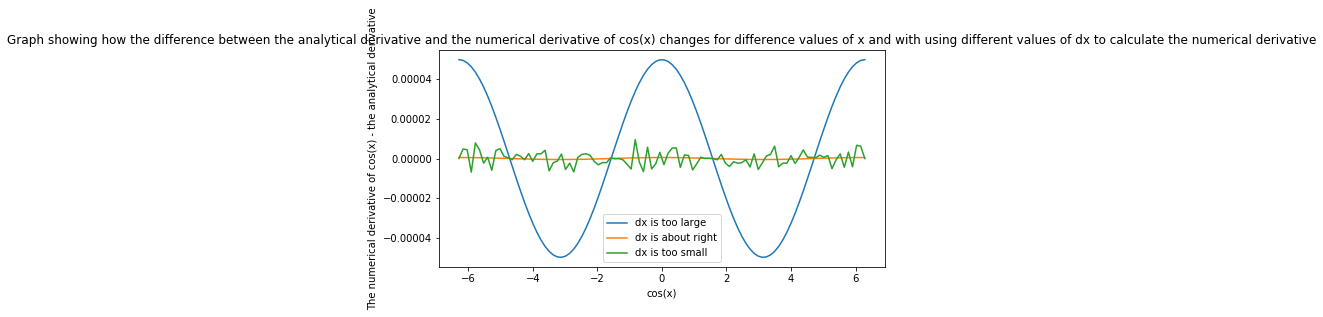

In [34]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_too_large = backward_difference(f, xs, dx=1e-4)
df_dx_about_right = backward_difference(f, xs, dx=1e-6)
df_dx_too_small = backward_difference(f, xs, dx=1e-11)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_too_large - df_dx_analytical, label= 'dx is too large')
plt.plot(xs, df_dx_about_right - df_dx_analytical, label= 'dx is about right')
plt.plot(xs, df_dx_too_small - df_dx_analytical, label= 'dx is too small')
plt.xlabel("cos(x)")
plt.ylabel("The numerical derivative of cos(x) - the analytical derivative")
plt.title("Graph showing how the difference between the analytical derivative and the numerical derivative of cos(x) changes for difference values of x and with using different values of dx to calculate the numerical derivative")
plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


If $\Delta$$x$ is too small, there are errors due to rounding. If $\Delta$$x$ is too large, the approximation that $dx$ is small that is required as part of the backwards difference method for calculating derivatives no longer applies.